In [1]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

plt.style.use('ggplot')

from sklearn import metrics

Input Data and Shape
(3000, 2)


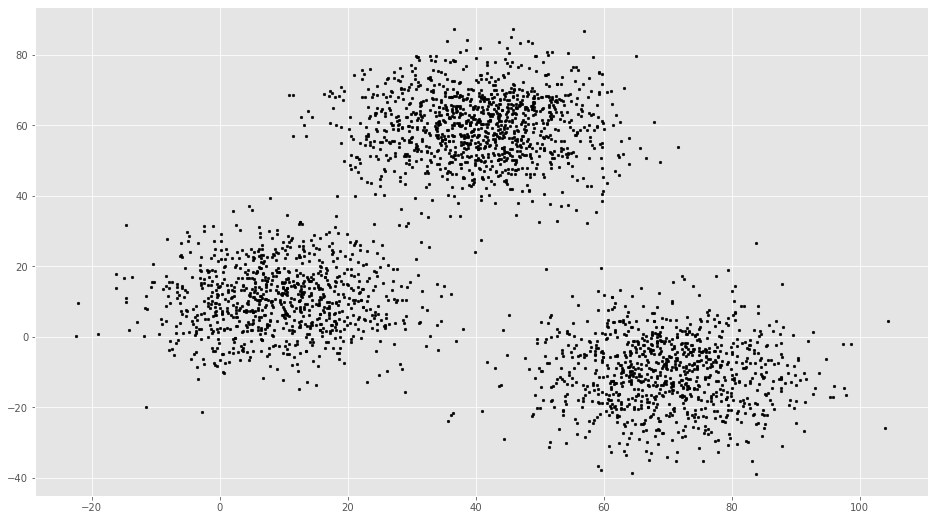

In [2]:
# Importing the dataset

data = pd.read_csv('dummy.csv')

print("Input Data and Shape")

print(data.shape)

data.head()



# Getting the values and plotting it

f1 = data['V1'].values

f2 = data['V2'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)

In [3]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [4]:
data.corr()

,V1,V2
V1,1.000000,-0.233874
V2,-0.233874,1.000000


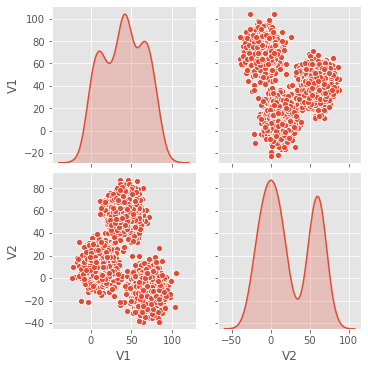

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(data,diag_kind='kde')

In [12]:
from sklearn.cluster import KMeans


# Let us check optimal number of clusters-


cluster_range = range( 2, 7)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]




,num_clusters,cluster_errors
0,2,2.310028e+06
1,3,6.116059e+05
2,4,5.356724e+05
3,5,4.843203e+05
4,6,4.093766e+05


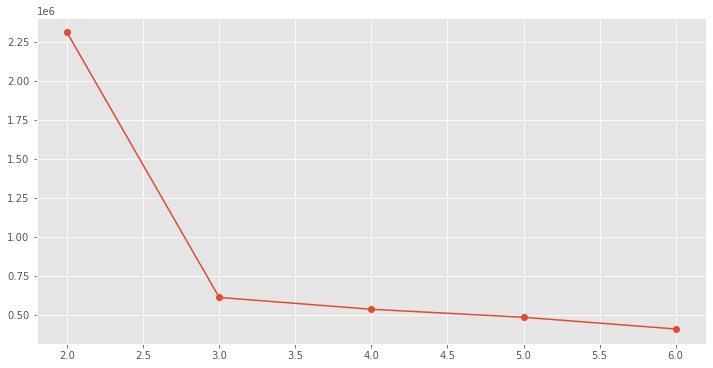

In [13]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [16]:


# Number of clusters

kmeans = KMeans(n_clusters=3)

# Fitting the input data

kmeans = kmeans.fit(X)

# Getting the cluster labels

labels = kmeans.predict(X)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]]


In [17]:
colnames = ["V1", "V2"]
prediction= kmeans.predict(X)
#X["clusters"] = prediction
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction



In [18]:
X_df

,V1,V2,group
0,2.072345,-3.241693,1
1,17.936710,15.784810,1
2,1.083576,7.319176,1
3,11.120670,14.406780,1
4,23.711550,2.557729,1
...,...,...,...
2995,85.652800,-6.461061,2
2996,82.770880,-2.373299,2
2997,64.465320,-10.501360,2
2998,90.722820,-12.255840,2


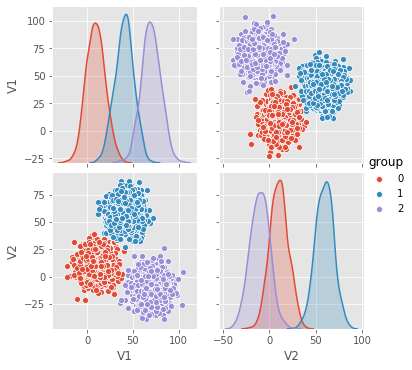

In [38]:
sns.pairplot(X_df,diag_kind='kde',hue='group')

In [36]:
for i in cluster_range:
    points = np.array(X_df.loc[X_df['group'] == i])
    
points

array([], shape=(0, 3), dtype=float64)

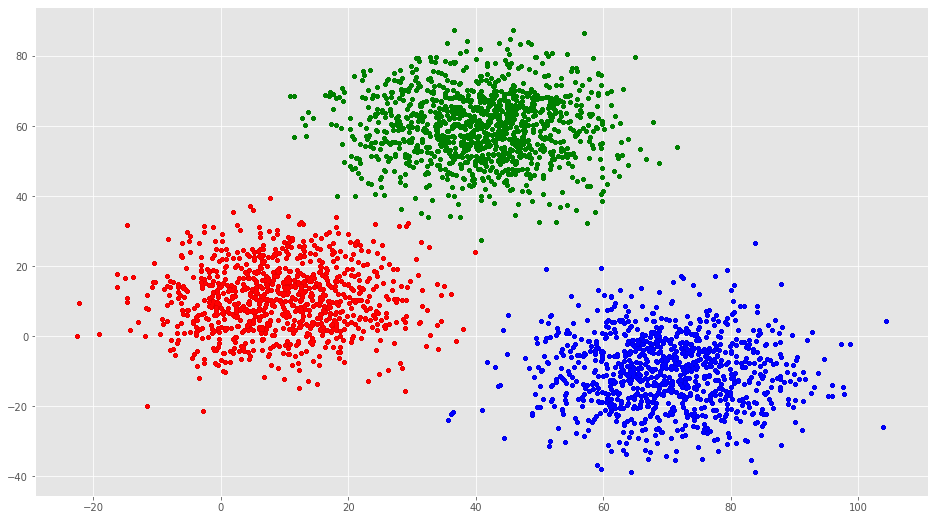

In [37]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(X_df.loc[X_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])


In [39]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

plt.style.use('ggplot')

from sklearn import metrics

In [46]:
# Importing the dataset

data = pd.read_csv('dummy.csv')

print("Input Data and Shape")

print(data.shape)

data.head()



# Getting the values and plotting it

f1 = data['V1'].values

f2 = data['V2'].values

X = pd.DataFrame(f2)

Input Data and Shape
(3000, 2)


In [47]:
from sklearn.cluster import KMeans


# Let us check optimal number of clusters-


cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]




,num_clusters,cluster_errors
0,1,3.025030e+06
1,2,4.868842e+05
2,3,2.298733e+05
3,4,1.595136e+05
4,5,9.816503e+04
5,6,7.393225e+04
6,7,5.744925e+04
7,8,4.408283e+04
8,9,3.590450e+04


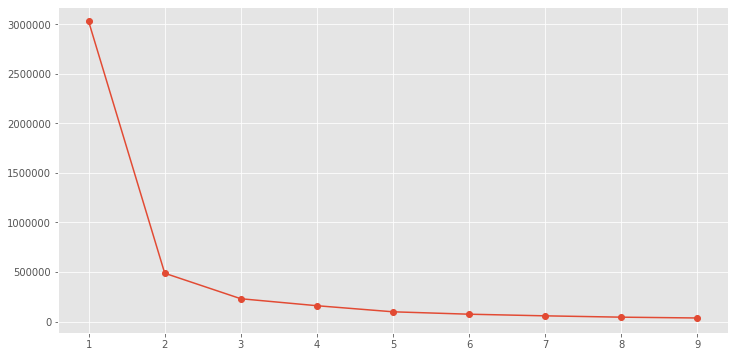

In [48]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [51]:


# Number of clusters

kmeans = KMeans(n_clusters=2)

# Fitting the input data

kmeans = kmeans.fit(X)

# Getting the cluster labels

labels = kmeans.predict(X)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[59.08697395  0.97108844]
 [-0.49334335  1.        ]]


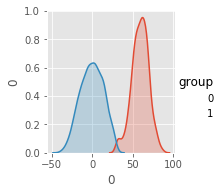

In [52]:
prediction= kmeans.predict(X)
X["group"] = prediction
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(X,diag_kind='kde',hue='group')